In [6]:
import torch as t
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import ncps 
from ncps.torch import LTC
from ncps.torch import CfC
from ncps.wirings import AutoNCP
import pytorch_lightning as pl

ModuleNotFoundError: No module named 'pytorch_lightning'

x  (600,)
y  (600,)
(600, 2)


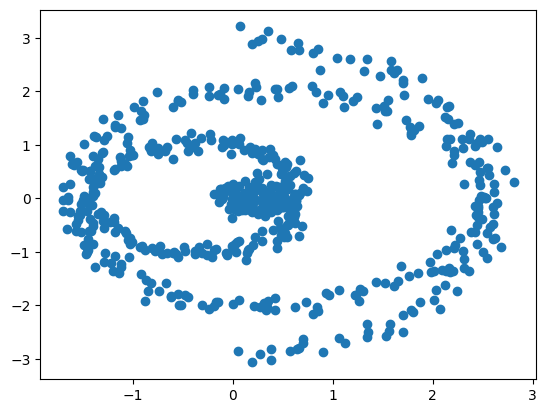

In [2]:
# data, consistent with neural odes
# Generate data

t_axis = np.arange(-3, 3, 0.01)

g_x = t_axis*np.sin(3.14*t_axis) + np.random.normal(0,0.1, len(t_axis))
#g_x = g_x(x_axis) + np.random.normal(0,0.3, len(x_axis))

g_y = t_axis*np.cos(3.14*t_axis) + np.random.normal(0,0.1, len(t_axis))
#g_y = g_x(x_axis) + np.random.normal(0,0.3, len(x_axis))

plt.scatter(g_x, g_y)
print("x ", g_x.shape)
print("y ", g_y.shape)

data = np.array(list(zip(g_x, g_y)))
print(data.shape)

In [5]:
wiring = AutoNCP(28, 2) # 28 neurons, 2 outputs
input_size = 2
rnn = CfC(input_size, wiring)

In [7]:
def training_step(model, x, y, batch_idx):
    y_hat, _ = model.forward(x)
    y_hat = y_hat.view_as(y)
    loss = nn.MSELoss()(y_hat, y)
    self.log("train_loss", loss, prog_bar=True)
    return {"loss": loss}

In [ ]:

for e in range(epochs):
  foresight_int = 15

  for i in range(len(data) - (foresight_int + 1)):
    fx.net.zero_grad()
    output = odeint(fx, data[i], t_axis[i:i+foresight_int])
    loss = T.mean((data[i: i+foresight_int] - output)**2)
    loss.backward()
    fx.optimizer.step()